In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import io
import http.client
import json
import time
import os
import pytz
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tqdm.notebook import tqdm
import yfinance as yf
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pattern = re.compile(r'\.\.\.(.*?)\.\.\.(\w+ \d{1,2}, \d{4})')
def fetch_news(page, arr):
    url = f'https://www.ft.com/search?q=NVIDIA&sort=date&isFirstView=true&page={page}'

    response = requests.get(url)

    try:
        soup = BeautifulSoup(response.content, 'html.parser')
        headlines = soup.find_all('div', class_='o-teaser__content')
        for headline in headlines:
            matches = re.findall(pattern, headline.text)
            obj = {}
            for match in matches:
                obj['Text'] = match[0].strip()
                obj['Date'] = match[1]
                arr.append(obj)
    except:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")

arr = []
for page in tqdm(range(1, 101)):
    fetch_news(page, arr)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
nvdatrain1 = pd.DataFrame(arr)
nvdatrain1.head()

,Text,Date
0,AI frenzy: Massive share price rallies for hig...,"June 19, 2024"
1,The differentiator with something like a Nvidi...,"June 19, 2024"
2,Nvidia capitalises on investor excitement over...,"June 19, 2024"
3,Nvidia is just the 12th company ever to lead t...,"June 18, 2024"
4,Nvidia was the sole gainer in the Magnificent ...,"June 18, 2024"


In [ ]:
nvdatrain1.to_csv('nvdatrain1.csv')

In [ ]:
def fetch_news(page, arr):
    url = f'https://www.ft.com/search?q=INTEL&sort=date&isFirstView=true&page={page}'

    response = requests.get(url)

    try:
        soup = BeautifulSoup(response.content, 'html.parser')
        headlines = soup.find_all('div', class_='o-teaser__content')
        for headline in headlines:
            matches = re.findall(pattern, headline.text)
            obj = {}
            for match in matches:
                obj['Text'] = match[0].strip()
                obj['Date'] = match[1]
                arr.append(obj)
    except:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")

arr = []
for page in tqdm(range(1, 201)):
    fetch_news(page, arr)

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
inteltrain1 = pd.DataFrame(arr)
inteltrain1.head()

,Text,Date
0,Intel will receive $8.5bn in direct funding an...,"March 20, 2024"
1,Intel’s chief executive Pat Gelsinger called i...,"March 20, 2024"
2,Nvidia’s new focus on AI inference addresses W...,"March 19, 2024"
3,Lucy Fisher Really interesting intel you’ve pi...,"March 15, 2024"
4,got the sense that while there’s a question ma...,"March 13, 2024"


In [ ]:
inteltrain1.to_csv('inteltrain1.csv')

In [ ]:
def fetch_news(page, arr):
    url = f'https://www.ft.com/search?q=AMD&sort=date&isFirstView=true&page={page}'

    response = requests.get(url)

    try:
        soup = BeautifulSoup(response.content, 'html.parser')
        headlines = soup.find_all('div', class_='o-teaser__content')
        for headline in headlines:
            matches = re.findall(pattern, headline.text)
            obj = {}
            for match in matches:
                obj['Text'] = match[0].strip()
                obj['Date'] = match[1]
                arr.append(obj)
    except:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")

arr = []
for page in tqdm(range(1, 101)):
    fetch_news(page, arr)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
amdtrain1 = pd.DataFrame(arr)
amdtrain1.head()

,Text,Date
0,Competitors such as AMD and Intel have launche...,"June 18, 2024"
1,Seven 2x Long ETFs will double the daily retur...,"June 13, 2024"
2,"In the “AI PC” space, rivals like Microsoft, Q...","June 10, 2024"
3,They are essentially replacing the Intel or AM...,"June 7, 2024"
4,Despite moves by rivals such as AMD and Intel ...,"June 6, 2024"


In [ ]:
amdtrain1.to_csv('amdtrain1.csv')

In [ ]:
def fetch_news(page, arr):
    url = f'https://www.ft.com/search?q=Qualcomm&sort=date&isFirstView=true&page={page}'

    response = requests.get(url)

    try:
        soup = BeautifulSoup(response.content, 'html.parser')
        headlines = soup.find_all('div', class_='o-teaser__content')
        for headline in headlines:
            matches = re.findall(pattern, headline.text)
            obj = {}
            for match in matches:
                obj['Text'] = match[0].strip()
                obj['Date'] = match[1]
                arr.append(obj)
    except:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")

arr = []
for page in tqdm(range(1, 101)):
    fetch_news(page, arr)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
qualcommtest1 = pd.DataFrame(arr)
qualcommtest1.head()

,Text,Date
0,Mobile chipmaker Qualcomm recently announced a...,"June 17, 2024"
1,"Last point here, India has 300,000 chip design...","June 16, 2024"
2,Mobile phone chipmaker Qualcomm also has a vas...,"June 13, 2024"
3,"In the “AI PC” space, rivals like Microsoft, Q...","June 10, 2024"
4,Qualcomm’s Amon hailed the collaboration as a ...,"June 6, 2024"


In [ ]:
qualcommtest1.to_csv('qualcommtest1.csv')

In [ ]:
date_pattern = r'\b(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?) \d{1,2}, \d{4}\b'
url = 'https://www.nytimes.com/search?dropmab=false&endDate=2024-06-10&query=NVIDIA&sections=Technology%7Cnyt%3A%2F%2Fsection%2F4224240f-b1ab-50bd-881f-782d6a3bc527&sort=best&startDate=2023-06-10'

response = requests.get(url)
hd = []
dt = []

soup = BeautifulSoup(response.content, 'html.parser')
headlines = soup.find_all('h4', class_='css-nsjm9t')
dates = soup.find_all('span', class_='css-coykat')
for headline in headlines:
    hd.append(headline.text)
for date in dates:
    match = re.search(date_pattern, date.text)
    extracted_date = match.group(0)
    dt.append(extracted_date)

In [ ]:
nvdatrain2 = pd.DataFrame({'Text': hd, 'Date': dt})
nvdatrain2.head()

,Text,Date
0,U.S. Clears Way for Antitrust Inquiries of Nvi...,"June 7, 2024"
1,Nvidia Says Growth Will Continue as A.I. Hits ...,"February 22, 2024"
2,"Nvidia, Powered by A.I. Boom, Reports Soaring ...","May 23, 2024"
3,Nvidia Revenue Doubles on Demand for A.I. Chip...,"August 24, 2023"
4,How Nvidia Built a Competitive Moat Around A.I...,"August 22, 2023"


In [ ]:
nvdatrain2.to_csv('nvdatrain2.csv')

In [ ]:
url = 'https://www.nytimes.com/search?dropmab=false&endDate=2024-06-10&query=INTEL&sections=Technology%7Cnyt%3A%2F%2Fsection%2F4224240f-b1ab-50bd-881f-782d6a3bc527&sort=best&startDate=2023-06-10'

response = requests.get(url)
hd = []
dt = []

soup = BeautifulSoup(response.content, 'html.parser')
headlines = soup.find_all('h4', class_='css-nsjm9t')
dates = soup.find_all('span', class_='css-coykat')
for headline in headlines:
    hd.append(headline.text)
for date in dates:
    match = re.search(date_pattern, date.text)
    extracted_date = match.group(0)
    dt.append(extracted_date)

In [ ]:
inteltrain2 = pd.DataFrame({'Text': hd, 'Date': dt})
inteltrain2.head()

,Text,Date
0,How the Big Chip Makers Are Pushing Back on Bi...,"October 8, 2023"
1,Plans to Expand U.S. Chip Manufacturing Are Ru...,"February 23, 2024"
2,Chinese Traders and Moroccan Ports: How Russia...,"December 20, 2023"
3,Nvidia Revenue Doubles on Demand for A.I. Chip...,"August 24, 2023"
4,Nvidia Says Growth Will Continue as A.I. Hits ...,"February 22, 2024"


In [ ]:
inteltrain2.to_csv('inteltrain2.csv')

In [ ]:
url = 'https://www.nytimes.com/search?dropmab=false&endDate=2024-06-10&query=AMD&sections=Technology%7Cnyt%3A%2F%2Fsection%2F4224240f-b1ab-50bd-881f-782d6a3bc527&sort=best&startDate=2023-06-10'

response = requests.get(url)
hd = []
dt = []

soup = BeautifulSoup(response.content, 'html.parser')
headlines = soup.find_all('h4', class_='css-nsjm9t')
dates = soup.find_all('span', class_='css-coykat')
for headline in headlines:
    hd.append(headline.text)
for date in dates:
    match = re.search(date_pattern, date.text)
    extracted_date = match.group(0)
    dt.append(extracted_date)

In [ ]:
amdtrain2 = pd.DataFrame({'Text': hd, 'Date': dt})
amdtrain2.head()

,Text,Date
0,"Nvidia, Powered by A.I. Boom, Reports Soaring ...","May 23, 2024"
1,A.I. Leaders Press Advantage With Congress as ...,"March 28, 2024"
2,Big Tech Rebounds and Preps for Transformative...,"August 5, 2023"
3,Nvidia’s Big Tech Rivals Put Their Own A.I. Ch...,"February 1, 2024"
4,How Nvidia Built a Competitive Moat Around A.I...,"August 22, 2023"


In [ ]:
amdtrain2.to_csv('amdtrain2.csv')

In [ ]:
url = 'https://www.nytimes.com/search?dropmab=false&endDate=2024-06-10&query=Qualcomm&sections=Technology%7Cnyt%3A%2F%2Fsection%2F4224240f-b1ab-50bd-881f-782d6a3bc527&sort=best&startDate=2023-06-10'

response = requests.get(url)
hd = []
dt = []

soup = BeautifulSoup(response.content, 'html.parser')
headlines = soup.find_all('h4', class_='css-nsjm9t')
dates = soup.find_all('span', class_='css-coykat')
for headline in headlines:
    hd.append(headline.text)
for date in dates:
    match = re.search(date_pattern, date.text)
    extracted_date = match.group(0)
    dt.append(extracted_date)

In [ ]:
qualcommtest2 = pd.DataFrame({'Text': hd, 'Date': dt})
qualcommtest2.head()

,Text,Date
0,How the Big Chip Makers Are Pushing Back on Bi...,"October 8, 2023"
1,"Arm, a British Chip Designer, Juggles Challeng...","September 13, 2023"
2,Silicon Valley Venture Capitalists Are Breakin...,"February 28, 2024"
3,Can Artificial Intelligence Make the PC Cool A...,"May 21, 2024"
4,Apple Keeps Losing Patent Cases. Its Solution:...,"March 22, 2024"


In [ ]:
qualcommtest2.to_csv('qualcommtest2.csv')

In [ ]:
url = 'https://economictimes.indiatimes.com/topic/nvidia'

response = requests.get(url)
hd = []
dt = []

soup = BeautifulSoup(response.content, 'html.parser')
headlines = soup.find_all('a', class_='wrapLines l2')
dates = soup.find_all('time')
for headline in headlines:
    hd.append(headline.text)

for date in dates:
    dt.append(date.text)

In [ ]:
nvdatrain3 = pd.DataFrame({'Text': hd, 'Date': dt})
nvdatrain3.head()

,Text,Date
0,"Nvidia’s 591,078% rally to most valuable stock...","19 Jun, 2024, 07:37 AM IST"
1,"Apple brings ChatGPT and more AI to devices, W...","11 Jun, 2024, 08:18 AM IST"
2,Nvidia's 10-for-1 stock split goes into effect...,"10 Jun, 2024, 06:40 PM IST"
3,Apple poised to launch its late start in the A...,"10 Jun, 2024, 10:07 AM IST"
4,Meta hit with privacy complaints over AI plans,"09 Jun, 2024, 06:00 AM IST"


In [ ]:
nvdatrain3.to_csv('nvdatrain3.csv')

In [ ]:
url = 'https://economictimes.indiatimes.com/topic/intel'

response = requests.get(url)
hd = []
dt = []

soup = BeautifulSoup(response.content, 'html.parser')
headlines = soup.find_all('a', class_='wrapLines l2')
dates = soup.find_all('time')
for headline in headlines:
    hd.append(headline.text)

for date in dates:
    dt.append(date.text)

In [ ]:
inteltrain3 = pd.DataFrame({'Text': hd, 'Date': dt})
inteltrain3.head()

,Text,Date
0,RBI to set up digital payments intel platform ...,"07 Jun, 2024, 01:54 PM IST"
1,Intel battles AMD with new data center chips,"04 Jun, 2024, 09:43 AM IST"
2,Arm aims to capture 50% of PC market in five y...,"03 Jun, 2024, 05:56 PM IST"
3,"Nvidia boss, top chip CEOs to lay out AI plans...","02 Jun, 2024, 04:33 PM IST"
4,"Eye on AI: Tech giants form industry group, Ap...","02 Jun, 2024, 06:00 AM IST"


In [ ]:
inteltrain3.to_csv('inteltrain3.csv')

In [ ]:
url = 'https://economictimes.indiatimes.com/topic/qualcomm'

response = requests.get(url)
hd = []
dt = []

soup = BeautifulSoup(response.content, 'html.parser')
headlines = soup.find_all('a', class_='wrapLines l2')
dates = soup.find_all('time')
for headline in headlines:
    hd.append(headline.text)

for date in dates:
    dt.append(date.text)

In [ ]:
qualcommtest3 = pd.DataFrame({'Text': hd, 'Date': dt})
qualcommtest3.head()

,Text,Date
0,Boat's parent brand Imagine Marketing India in...,"10 Jun, 2024, 05:27 PM IST"
1,"Oppo sets up AI centre in China, rolled out ov...","05 Jun, 2024, 02:34 PM IST"
2,Arm aims to capture 50% of PC market in five y...,"03 Jun, 2024, 05:56 PM IST"
3,"Nvidia boss, top chip CEOs to lay out AI plans...","02 Jun, 2024, 04:33 PM IST"
4,"Cryptocurrencies: Misunderstood in a hurry, 99...","31 May, 2024, 05:39 PM IST"


In [ ]:
qualcommtest3.to_csv('qualcommtest3.csv')

In [ ]:
def convert_date(date_str):
    date_obj = datetime.strptime(date_str, "%d %b, %Y, %I:%M %p IST")
    return date_obj.strftime("%B %d, %Y")

In [ ]:
nvdatrain3['Date'] = nvdatrain3['Date'].apply(convert_date)
inteltrain3['Date'] = inteltrain3['Date'].apply(convert_date)
qualcommtest3['Date'] = qualcommtest3['Date'].apply(convert_date)

In [ ]:
nvda = pd.concat([nvdatrain1, nvdatrain2, nvdatrain3]).reset_index(drop=True)
nvda.head()

,Text,Date
0,AI frenzy: Massive share price rallies for hig...,"June 19, 2024"
1,The differentiator with something like a Nvidi...,"June 19, 2024"
2,Nvidia capitalises on investor excitement over...,"June 19, 2024"
3,Nvidia is just the 12th company ever to lead t...,"June 18, 2024"
4,Nvidia was the sole gainer in the Magnificent ...,"June 18, 2024"


In [ ]:
nvda.drop_duplicates(inplace=True)
nvda.shape

(887, 2)

In [ ]:
nvda['Date'] = pd.to_datetime(nvda['Date'])
nvda.head()

,Text,Date
0,AI frenzy: Massive share price rallies for hig...,2024-06-19
1,The differentiator with something like a Nvidi...,2024-06-19
2,Nvidia capitalises on investor excitement over...,2024-06-19
3,Nvidia is just the 12th company ever to lead t...,2024-06-18
4,Nvidia was the sole gainer in the Magnificent ...,2024-06-18


In [ ]:
intel = pd.concat([inteltrain1, inteltrain2, inteltrain3]).reset_index(drop=True)
intel.head()

,Text,Date
0,Intel will receive $8.5bn in direct funding an...,"March 20, 2024"
1,Intel’s chief executive Pat Gelsinger called i...,"March 20, 2024"
2,Nvidia’s new focus on AI inference addresses W...,"March 19, 2024"
3,Lucy Fisher Really interesting intel you’ve pi...,"March 15, 2024"
4,got the sense that while there’s a question ma...,"March 13, 2024"


In [ ]:
intel.drop_duplicates(inplace=True)
intel.shape

(748, 2)

In [ ]:
intel['Date'] = pd.to_datetime(intel['Date'])
intel.head()

,Text,Date
0,Intel will receive $8.5bn in direct funding an...,2024-03-20
1,Intel’s chief executive Pat Gelsinger called i...,2024-03-20
2,Nvidia’s new focus on AI inference addresses W...,2024-03-19
3,Lucy Fisher Really interesting intel you’ve pi...,2024-03-15
4,got the sense that while there’s a question ma...,2024-03-13


In [ ]:
amd = pd.concat([amdtrain1, amdtrain2]).reset_index(drop=True)
amd.head()

,Text,Date
0,Competitors such as AMD and Intel have launche...,"June 18, 2024"
1,Seven 2x Long ETFs will double the daily retur...,"June 13, 2024"
2,"In the “AI PC” space, rivals like Microsoft, Q...","June 10, 2024"
3,They are essentially replacing the Intel or AM...,"June 7, 2024"
4,Despite moves by rivals such as AMD and Intel ...,"June 6, 2024"


In [ ]:
amd.drop_duplicates(inplace=True)
amd.shape

(754, 2)

In [ ]:
amd['Date'] = pd.to_datetime(amd['Date'])
amd.head()

,Text,Date
0,Competitors such as AMD and Intel have launche...,2024-06-18
1,Seven 2x Long ETFs will double the daily retur...,2024-06-13
2,"In the “AI PC” space, rivals like Microsoft, Q...",2024-06-10
3,They are essentially replacing the Intel or AM...,2024-06-07
4,Despite moves by rivals such as AMD and Intel ...,2024-06-06


In [ ]:
qualcomm = pd.concat([qualcommtest1, qualcommtest2, qualcommtest3]).reset_index(drop=True)
qualcomm.head()

,Text,Date
0,Mobile chipmaker Qualcomm recently announced a...,"June 17, 2024"
1,"Last point here, India has 300,000 chip design...","June 16, 2024"
2,Mobile phone chipmaker Qualcomm also has a vas...,"June 13, 2024"
3,"In the “AI PC” space, rivals like Microsoft, Q...","June 10, 2024"
4,Qualcomm’s Amon hailed the collaboration as a ...,"June 6, 2024"


In [ ]:
qualcomm.drop_duplicates(inplace=True)
qualcomm.shape

(774, 2)

In [ ]:
qualcomm['Date'] = pd.to_datetime(qualcomm['Date'])
qualcomm.head()

,Text,Date
0,Mobile chipmaker Qualcomm recently announced a...,2024-06-17
1,"Last point here, India has 300,000 chip design...",2024-06-16
2,Mobile phone chipmaker Qualcomm also has a vas...,2024-06-13
3,"In the “AI PC” space, rivals like Microsoft, Q...",2024-06-10
4,Qualcomm’s Amon hailed the collaboration as a ...,2024-06-06


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]|[\d]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nvda['Text'] = nvda['Text'].apply(preprocess_text)
intel['Text'] = intel['Text'].apply(preprocess_text)
amd['Text'] = amd['Text'].apply(preprocess_text)
qualcomm['Text'] = qualcomm['Text'].apply(preprocess_text)

In [ ]:
nvda.head()

,Text,Date
0,ai frenzy massive share price rally highprofil...,2024-06-19
1,differentiator something like nvidia delivered...,2024-06-19
2,nvidia capitalises investor excitement artific...,2024-06-19
3,nvidia th company ever lead sp since inception,2024-06-18
4,nvidia sole gainer magnificent seven per cent ...,2024-06-18


In [ ]:
intel.head()

,Text,Date
0,intel receive bn direct funding bn loan u gove...,2024-03-20
1,intels chief executive pat gelsinger called de...,2024-03-20
2,nvidias new focus ai inference address wall st...,2024-03-19
3,lucy fisher really interesting intel youve pic...,2024-03-15
4,got sense there question mark u might expand d...,2024-03-13


In [ ]:
amd.head()

,Text,Date
0,competitor amd intel launched competing ai chi...,2024-06-18
1,seven x long etf double daily return apple amd...,2024-06-13
2,ai pc space rival like microsoft qualcomm amd ...,2024-06-10
3,essentially replacing intel amd cpu arm cpu ca...,2024-06-07
4,despite move rival amd intel capture nvidias m...,2024-06-06


In [ ]:
qualcomm.head()

,Text,Date
0,mobile chipmaker qualcomm recently announced c...,2024-06-17
1,last point india chip designer working qualcom...,2024-06-16
2,mobile phone chipmaker qualcomm also vast sep ...,2024-06-13
3,ai pc space rival like microsoft qualcomm amd ...,2024-06-10
4,qualcomms amon hailed collaboration history de...,2024-06-06


In [ ]:
model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def sentiment_scores(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'Neg': scores[0],
        'Neu': scores[1],
        'Pos': scores[2]
    }
    return scores_dict

In [ ]:
def merge_sentiment_scores(df):
    res = {}
    for i, row in tqdm(df.iterrows(), total=len(df)):
      try:
        text = sentiment_scores(row['Text'])
        res[i] = text
      except:
        pass
    res_data = pd.DataFrame(res).T
    df = pd.merge(df, res_data, left_index=True, right_index=True)
    return df

In [ ]:
nvda = merge_sentiment_scores(nvda)
intel = merge_sentiment_scores(intel)
amd = merge_sentiment_scores(amd)
qualcomm = merge_sentiment_scores(qualcomm)

  0%|          | 0/887 [00:00<?, ?it/s]

  0%|          | 0/748 [00:00<?, ?it/s]

  0%|          | 0/754 [00:00<?, ?it/s]

  0%|          | 0/774 [00:00<?, ?it/s]

In [ ]:
train1 = pd.concat([nvda, intel, amd], axis=0)
train1.dropna(inplace=True)
train1.drop_duplicates(inplace=True)

In [ ]:
train1.shape

(2312, 5)

In [ ]:
train1 = train1.groupby('Date')[['Neg', 'Neu', 'Pos']].mean().reset_index()

In [ ]:
train1.head()

,Date,Neg,Neu,Pos
0,2004-09-10,0.098544,0.852445,0.049011
1,2004-09-21,0.109157,0.828315,0.062528
2,2004-10-07,0.018954,0.634898,0.346148
3,2004-10-11,0.621176,0.360143,0.018681
4,2005-01-11,0.711304,0.273854,0.014842


In [ ]:
qualcomm = qualcomm.groupby('Date')[['Neg', 'Neu', 'Pos']].mean().reset_index()

In [ ]:
qualcomm.head()

,Date,Neg,Neu,Pos
0,2018-01-17,0.023932,0.936962,0.039106
1,2018-01-18,0.452862,0.518790,0.028348
2,2018-01-19,0.021737,0.777996,0.200267
3,2018-01-23,0.059234,0.810210,0.130556
4,2018-01-24,0.123189,0.831084,0.045727


In [ ]:
nvda_stock = yf.Ticker('NVDA').history(period='max')
nvda_stock.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
nvda_stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000
1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000
1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000
1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000
1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000


In [ ]:
intel_stock = yf.Ticker('INTC').history(period='max')
intel_stock.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
intel_stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-03-17 00:00:00-05:00,0.183393,0.186327,0.183393,0.183393,10924800
1980-03-18 00:00:00-05:00,0.183393,0.184860,0.181926,0.181926,17068800
1980-03-19 00:00:00-05:00,0.186327,0.189262,0.186327,0.186327,18508800
1980-03-20 00:00:00-05:00,0.186327,0.188528,0.185594,0.185594,11174400
1980-03-21 00:00:00-05:00,0.181926,0.181926,0.178991,0.178991,12172800


In [ ]:
amd_stock = yf.Ticker('AMD').history(period='max')
amd_stock.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
amd_stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-03-17 00:00:00-05:00,0.0,3.302083,3.125000,3.145833,219600
1980-03-18 00:00:00-05:00,0.0,3.125000,2.937500,3.031250,727200
1980-03-19 00:00:00-05:00,0.0,3.083333,3.020833,3.041667,295200
1980-03-20 00:00:00-05:00,0.0,3.062500,3.010417,3.010417,159600
1980-03-21 00:00:00-05:00,0.0,3.020833,2.906250,2.916667,130800


In [ ]:
qualcomm_stock = yf.Ticker('QCOM').history(period='max')
qualcomm_stock.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
qualcomm_stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
1991-12-13 00:00:00-05:00,0.332506,0.371624,0.327616,0.352065,143667200
1991-12-16 00:00:00-05:00,0.352065,0.361844,0.337396,0.347175,22585600
1991-12-17 00:00:00-05:00,0.361844,0.361844,0.342285,0.347175,16176000
1991-12-18 00:00:00-05:00,0.347175,0.356955,0.347175,0.356955,10899200
1991-12-19 00:00:00-05:00,0.356955,0.356955,0.342285,0.342285,7299200


In [ ]:
nvda_stock.reset_index(inplace=True)
intel_stock.reset_index(inplace=True)
amd_stock.reset_index(inplace=True)
qualcomm_stock.reset_index(inplace=True)

In [ ]:
nvda_stock['Date'] = pd.to_datetime(nvda_stock['Date']).dt.strftime('%Y-%m-%d')
intel_stock['Date'] = pd.to_datetime(intel_stock['Date']).dt.strftime('%Y-%m-%d')
amd_stock['Date'] = pd.to_datetime(amd_stock['Date']).dt.strftime('%Y-%m-%d')
qualcomm_stock['Date'] = pd.to_datetime(qualcomm_stock['Date']).dt.strftime('%Y-%m-%d')

In [ ]:
nvda_stock.rename(columns={'Date': 'date'}, inplace=True)
intel_stock.rename(columns={'Date': 'date'}, inplace=True)
amd_stock.rename(columns={'Date': 'date'}, inplace=True)
qualcomm_stock.rename(columns={'Date': 'date'}, inplace=True)

In [ ]:
def label_text(row):
    if row['Close'] > row['Open']:
        return 1
    elif row['Close'] < row['Open']:
        return 0
    else:
        return -1

In [ ]:
nvda_stock['Label'] = nvda_stock.apply(label_text, axis=1)
intel_stock['Label'] = intel_stock.apply(label_text, axis=1)
amd_stock['Label'] = amd_stock.apply(label_text, axis=1)
qualcomm_stock['Label'] = qualcomm_stock.apply(label_text, axis=1)

In [ ]:
train2 = pd.concat([nvda_stock, intel_stock, amd_stock], axis=0)
train2['date'] = pd.to_datetime(train2['date'])

In [ ]:
train2.head()

,date,Open,High,Low,Close,Volume,Label
0,1999-01-22,0.040129,0.044786,0.035590,0.037621,2714688000,0
1,1999-01-25,0.040607,0.042039,0.037621,0.041562,510480000,1
2,1999-01-26,0.042039,0.042876,0.037740,0.038337,343200000,0
3,1999-01-27,0.038457,0.039412,0.036307,0.038218,244368000,0
4,1999-01-28,0.038218,0.038457,0.037859,0.038098,227520000,0


In [ ]:
qualcomm_stock.head()

,date,Open,High,Low,Close,Volume,Label
0,1991-12-13,0.332506,0.371624,0.327616,0.352065,143667200,1
1,1991-12-16,0.352065,0.361844,0.337396,0.347175,22585600,0
2,1991-12-17,0.361844,0.361844,0.342285,0.347175,16176000,0
3,1991-12-18,0.347175,0.356955,0.347175,0.356955,10899200,1
4,1991-12-19,0.356955,0.356955,0.342285,0.342285,7299200,0


In [ ]:
train = pd.merge(train1, train2, left_on='Date', right_on='date').drop(columns=['date'])

In [ ]:
train = train[train['Label'] != -1]

In [ ]:
train.head()

,Date,Neg,Neu,Pos,Open,High,Low,Close,Volume,Label
0,2004-09-10,0.098544,0.852445,0.049011,0.101812,0.108080,0.101507,0.107545,1039344000,1
1,2004-09-10,0.098544,0.852445,0.049011,11.782750,12.068428,11.648656,11.992636,67196300,1
2,2004-09-10,0.098544,0.852445,0.049011,11.600000,12.290000,11.520000,12.210000,11075900,1
3,2004-09-21,0.109157,0.828315,0.062528,0.114653,0.116029,0.113278,0.115112,503904000,1
4,2004-09-21,0.109157,0.828315,0.062528,12.336615,12.447389,12.231672,12.289974,59345700,0


In [ ]:
qualcomm_stock['date'] = pd.to_datetime(qualcomm_stock['date'])

In [ ]:
test = pd.merge(qualcomm, qualcomm_stock, left_on='Date', right_on='date').drop(columns=['date'])

In [ ]:
test = test[test['Label'] != -1]

In [ ]:
test.head()

,Date,Neg,Neu,Pos,Open,High,Low,Close,Volume,Label
0,2018-01-17,0.023932,0.936962,0.039106,57.486992,57.805809,56.413097,57.067501,12559100,0
1,2018-01-18,0.452862,0.518790,0.028348,56.840985,57.201747,56.622848,57.092682,6797900,1
3,2018-01-23,0.059234,0.810210,0.130556,57.554124,57.805821,57.252090,57.335987,7825600,0
4,2018-01-24,0.123189,0.831084,0.045727,57.218510,57.294021,56.530546,57.033939,12383100,0
5,2018-01-25,0.230737,0.677463,0.091800,57.168177,57.361146,56.455045,56.564110,9122200,0


In [ ]:
X_train = train[["Close", "Neg", "Neu", "Pos"]]
y_train = train["Label"]
X_test = test[["Close", "Neg", "Neu", "Pos"]]
y_test = test["Label"]

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.0 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
def getMetrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    return accuracy, precision, recall, f1, roc_auc

rf_clf = RandomForestClassifier(max_depth=5,random_state=42)
svm_clf = SVC(random_state=42)
lr_clf = LogisticRegression(random_state=42)
catboost_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=False, random_state=42)
xgboost_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
adaboost_clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
for clf in tqdm([rf_clf, svm_clf, lr_clf, catboost_clf, xgboost_clf, adaboost_clf]):
    accuracy, precision, recall, f1, roc_auc = getMetrics(clf, X_train, y_train, X_test, y_test)
    print(f"{clf.__class__.__name__}:")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")

  0%|          | 0/6 [00:00<?, ?it/s]

RandomForestClassifier:
Accuracy: 0.45, Precision: 0.48, Recall: 0.41, F1-Score: 0.44, ROC-AUC: 0.45
SVC:
Accuracy: 0.50, Precision: 0.52, Recall: 0.71, F1-Score: 0.60, ROC-AUC: 0.48
LogisticRegression:
Accuracy: 0.49, Precision: 0.52, Recall: 0.60, F1-Score: 0.56, ROC-AUC: 0.49
CatBoostClassifier:
Accuracy: 0.42, Precision: 0.45, Recall: 0.46, F1-Score: 0.46, ROC-AUC: 0.41
XGBClassifier:
Accuracy: 0.45, Precision: 0.48, Recall: 0.46, F1-Score: 0.47, ROC-AUC: 0.45
AdaBoostClassifier:
Accuracy: 0.48, Precision: 0.51, Recall: 0.50, F1-Score: 0.50, ROC-AUC: 0.48


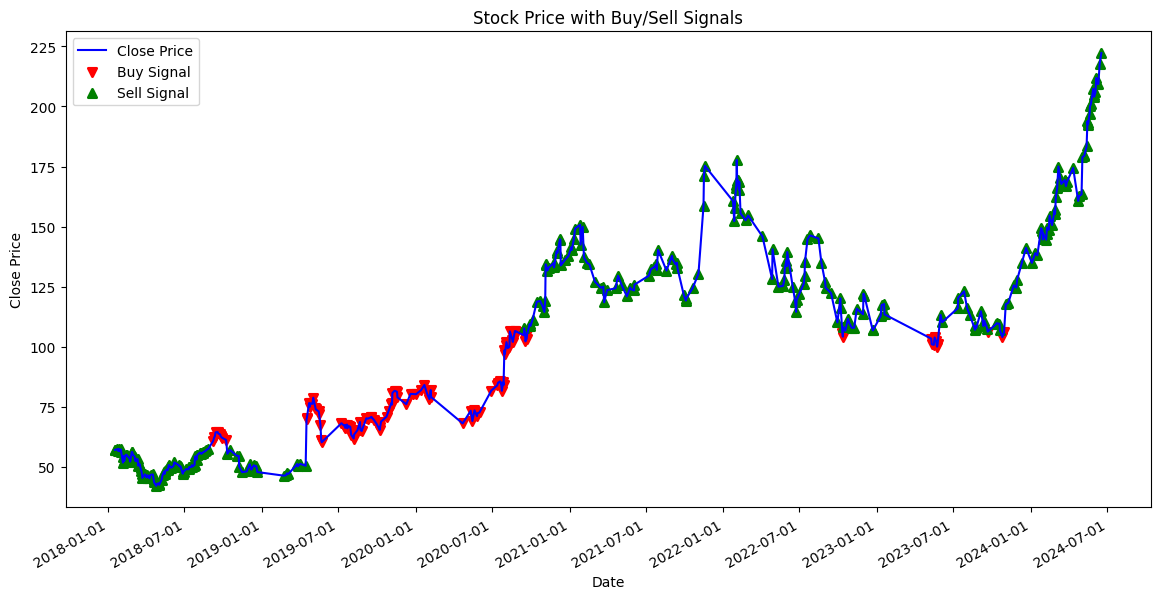

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Best model comes to be SVC
y_pred = svm_clf.predict(X_test)
test['Date'] = pd.to_datetime(test['Date'])
plt.figure(figsize=(14, 7))
plt.plot(test['Date'], test['Close'], label='Close Price', color='blue')
plt.scatter(test.loc[y_test.index, 'Date'][y_pred == 0], test.loc[y_test.index, 'Close'][y_pred == 0], label='Buy Signal', color='red', marker='v', linewidths=2)
plt.scatter(test.loc[y_test.index, 'Date'][y_pred == 1], test.loc[y_test.index, 'Close'][y_pred == 1], label='Sell Signal', color='green', marker='^', linewidths=2)
plt.title('Stock Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
locator = mdates.AutoDateLocator(minticks=10, maxticks=15)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.show()

In [ ]:
initial_cash = 10000
cash = initial_cash
shares = 0
portfolio_values = []
trade_dates = []
entry_prices = []
exit_prices = []
num_trades = 0
close_index = test.columns.get_loc('Close')

for i in range(len(test) - 1):
    if y_pred[i] == 0:
        if cash > 0:
            shares = cash / test.iloc[i+1, close_index]
            cash = 0
            trade_dates.append(test.iloc[i+1, test.columns.get_loc('Date')])
            entry_prices.append(test.iloc[i+1, close_index])
            num_trades += 1
    elif y_pred[i] == 1:
        if shares > 0:
            cash = shares * test.iloc[i+1, close_index]
            shares = 0
            trade_dates.append(test.iloc[i+1, test.columns.get_loc('Date')])
            exit_prices.append(test.iloc[i+1, close_index])
            num_trades += 1

    portfolio_value = cash + shares * test.iloc[i+1, close_index]
    portfolio_values.append(portfolio_value)

if shares > 0:
    portfolio_value = cash + shares * test.iloc[len(test) - 1, close_index]
    portfolio_values.append(portfolio_value)
else:
    portfolio_values.append(cash)

final_portfolio_value = portfolio_values[-1]
returns = (final_portfolio_value - initial_cash) / initial_cash * 100

daily_returns = np.diff(portfolio_values) / portfolio_values[:-1]

risk_free_rate = 0.45
sharpe_ratio = (np.mean(daily_returns) - risk_free_rate / 252) / np.std(daily_returns) * np.sqrt(252)

cumulative_returns = np.array(portfolio_values) / initial_cash
drawdowns = 1 - cumulative_returns / np.maximum.accumulate(cumulative_returns)
max_drawdown = np.max(drawdowns)

win_trades = sum([exit > entry for entry, exit in zip(entry_prices, exit_prices)])
win_ratio = win_trades / num_trades if num_trades > 0 else 0

print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Total Returns: {returns:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2f}")
print(f"Number of Trades Executed: {num_trades}")
print(f"Win Ratio: {win_ratio:.2f}")

Final Portfolio Value: $17279.15
Total Returns: 72.79%
Sharpe Ratio: 1.02
Maximum Drawdown: 0.24
Number of Trades Executed: 16
Win Ratio: 0.38
